In [1]:
import os
print(os.listdir())

['.config', 'ai-course.png', 'sample_data']


In [4]:
import numpy as np
import cv2
my_image = cv2.imread("ai-course.png")

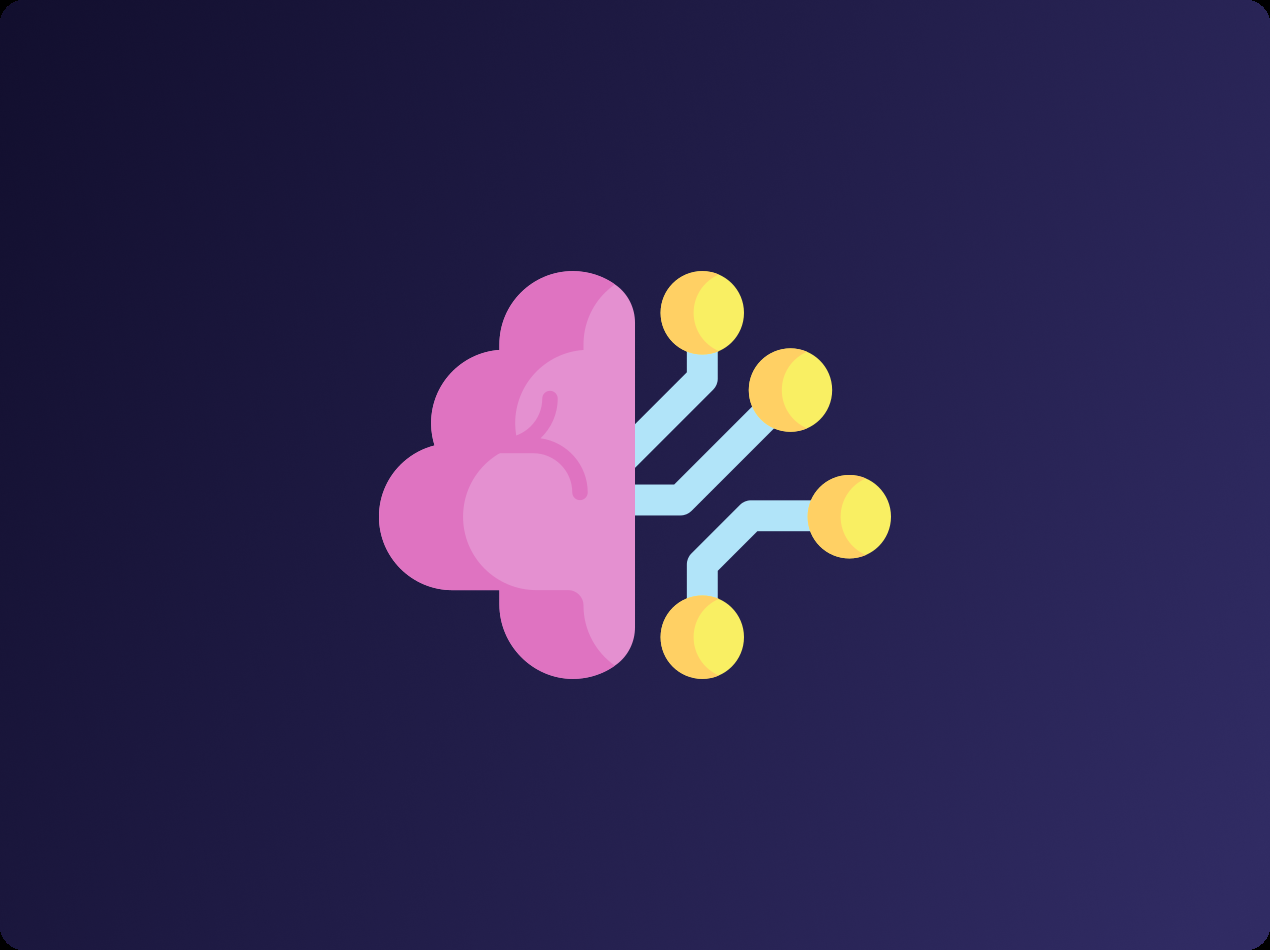

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(my_image)

# **Convert to Grayscale**

In [11]:

gray_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
#gray_image = cv2_imshow(gray_image)
print(gray_image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
cv2.imwrite("gray_image.png", gray_image)

True

In [13]:
os.stat("gray_image.png").st_size
os.stat("ai-course.png").st_size

913744

In [14]:
type(gray_image)

numpy.ndarray

In [15]:
len(gray_image)

950

In [17]:
blurred_image = cv2.GaussianBlur(my_image, (7, 7), 0)

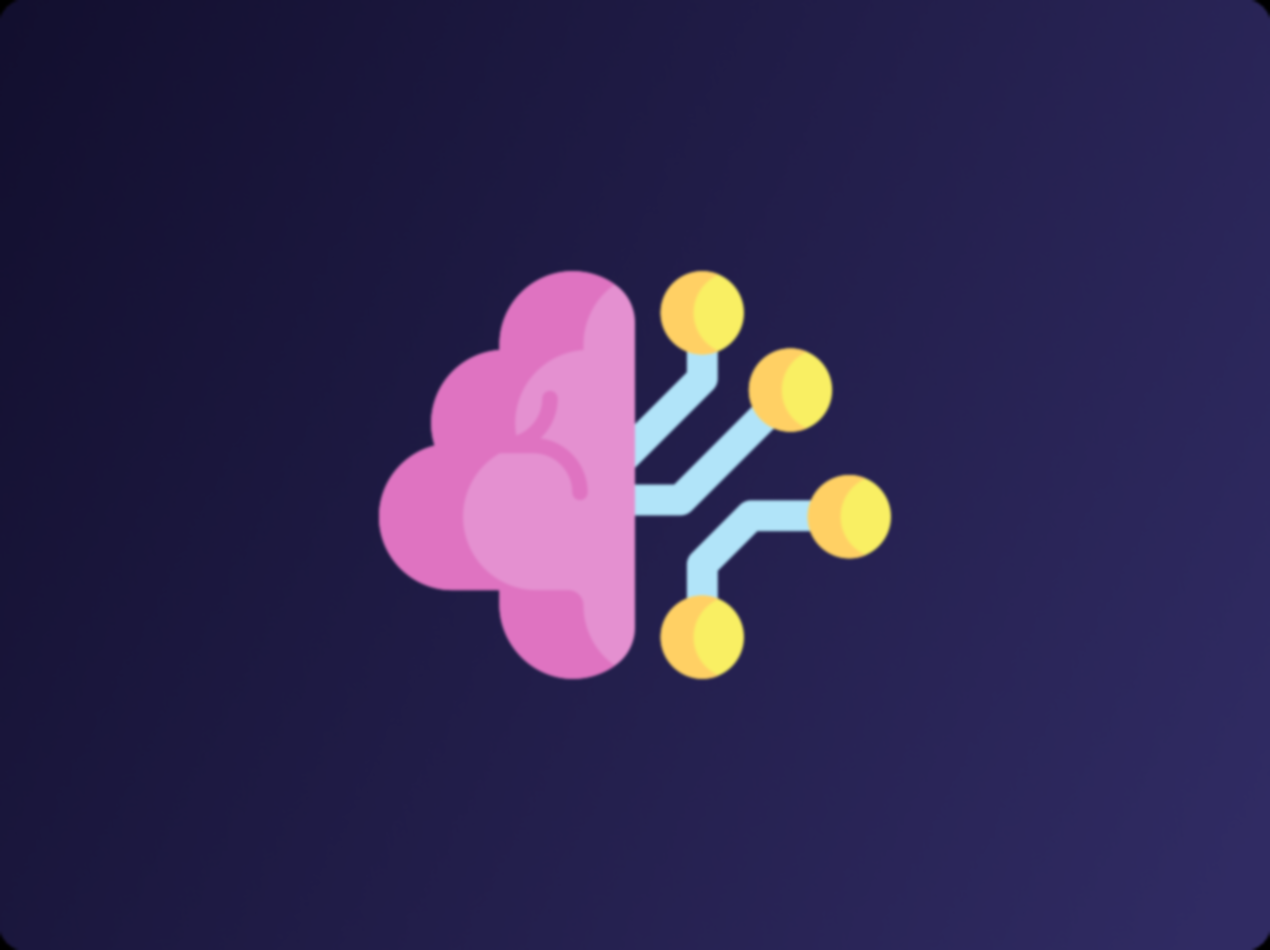

In [19]:
cv2_imshow(blurred_image)

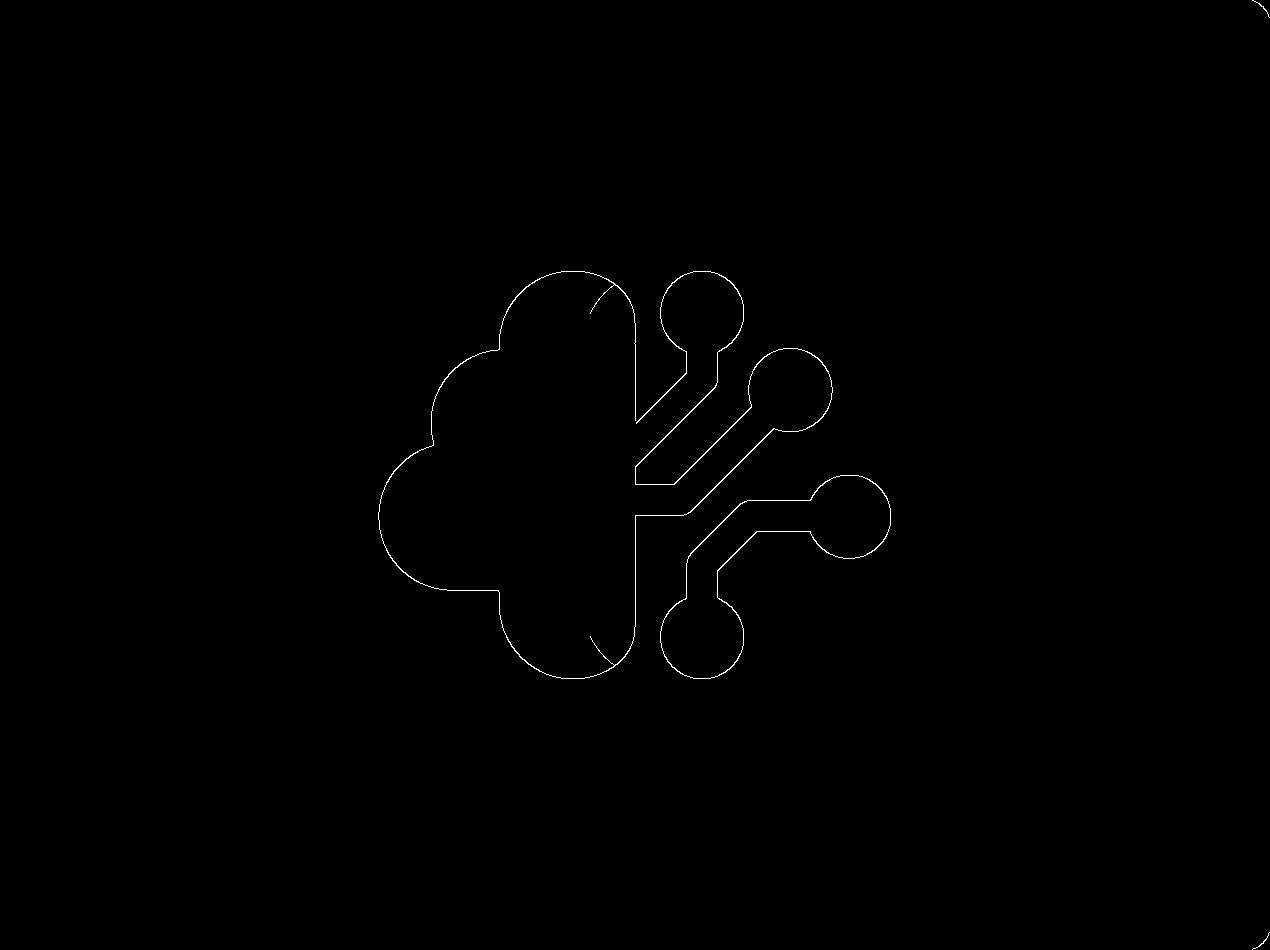

In [21]:
edges = cv2.Canny(gray_image, 100, 200)

cv2_imshow(edges)

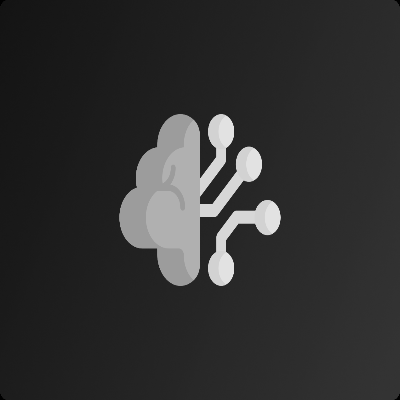

In [24]:
# Resize the image
resized_image = cv2.resize(gray_image, (400, 400))

# Display the resized image
cv2_imshow(resized_image)

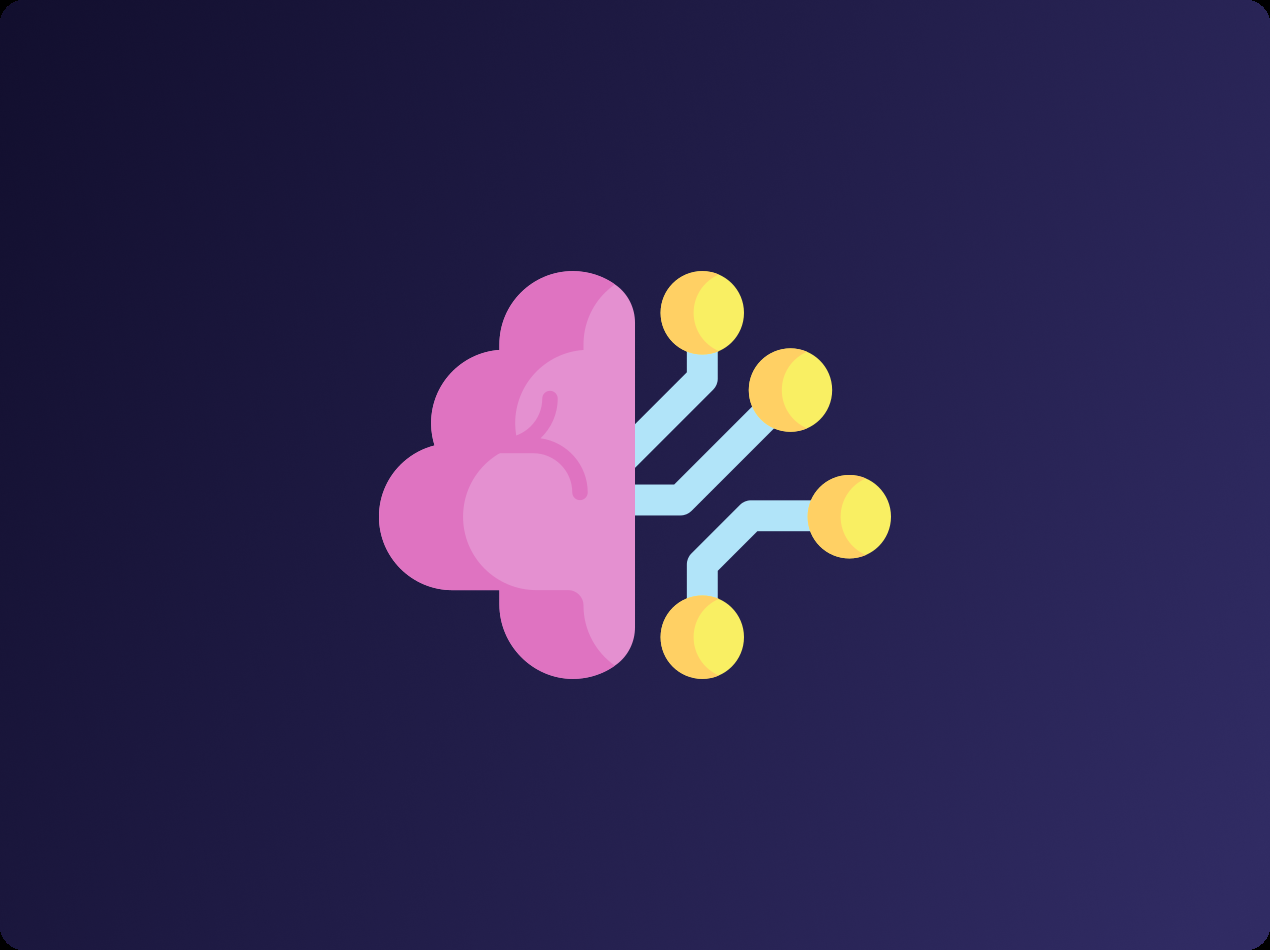

In [25]:
# Load the pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with detected faces
cv2_imshow(image)

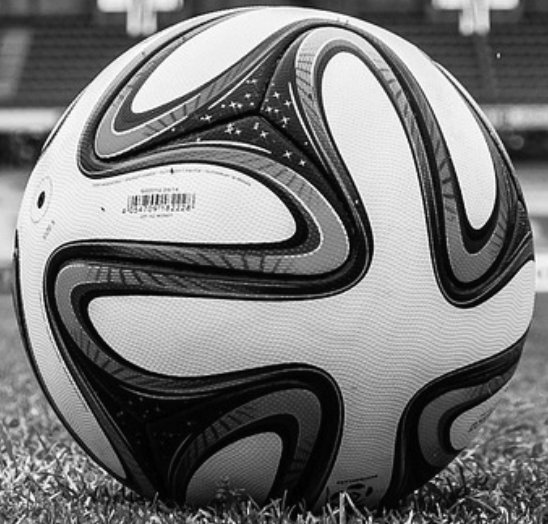

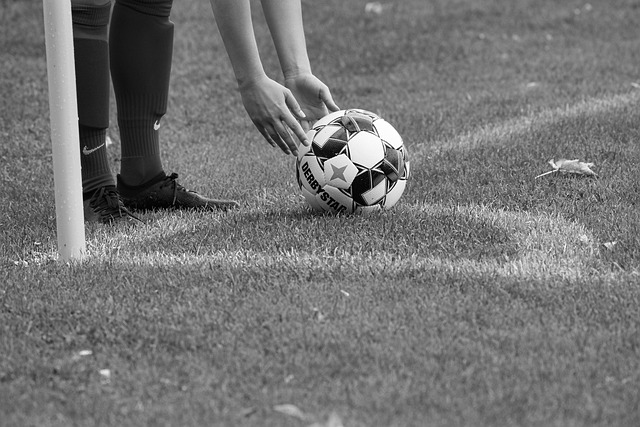

In [39]:
import cv2
from google.colab.patches import cv2_imshow

# Load the template and frame images
template = cv2.imread("template.png", 0)  # Ensure your image file paths are correct
frame = cv2.imread("frame.jpg", 0)

# Display the images
cv2_imshow(template)  # Use cv2_imshow instead of cv2.imshow
cv2_imshow(frame)

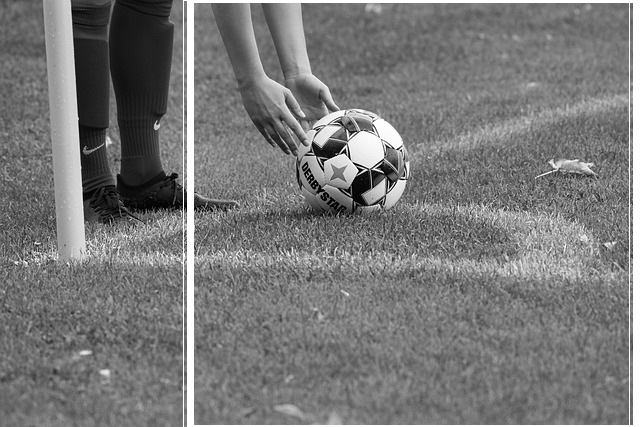

In [46]:
import cv2
from google.colab.patches import cv2_imshow

# Resize the template if it's larger than the frame
if template.shape[0] > frame.shape[0] or template.shape[1] > frame.shape[1]:
    scale_factor = min(frame.shape[0] / template.shape[0], frame.shape[1] / template.shape[1])
    new_size = (int(template.shape[1] * scale_factor), int(template.shape[0] * scale_factor))
    template = cv2.resize(template, new_size)

# Perform template matching
result = cv2.matchTemplate(frame, template, cv2.TM_CCOEFF_NORMED)

# Find the location of the best match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw a rectangle on the original image at the location of the best match
top_left = max_loc  # The top-left corner of the matched region
h, w = template.shape  # Get the height and width of the template
bottom_right = (top_left[0] + w, top_left[1] + h)

# Draw a rectangle around the matched region
cv2.rectangle(frame, top_left, bottom_right, (255, 0, 0), 1)

# Display the original frame with the rectangle
cv2_imshow(frame)
